In [32]:
# basics

import numpy as np
import pandas as pd

# astropy

import astropy.units as u
from astropy.constants import R_sun

# matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

# data management

import time
metatstamp = time.strftime("%d_%m_%Y", time.localtime())

import os
CWD = "/".join(os.getcwd().split("/")[:-2])

# Compare latitudes with superactive sunspots

In [33]:
# solar superactive regions
sun =  pd.read_csv(f"{CWD}/data/solar/sars.csv", skiprows=6) 

# results
outs = pd.read_csv(f"{CWD}/analysis/results/mcmc/15_12_2020_GP_mcmcoutput.csv")

# flare latitudes
coo = outs[["latitude_deg_50","latitude_deg_84","latitude_deg_16"]]
coo = np.sin(coo/180*np.pi)
yup, ylow = (coo.latitude_deg_84 - coo.latitude_deg_50,
             coo.latitude_deg_50 - coo.latitude_deg_16)

# Plot a projected hemisphere

findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


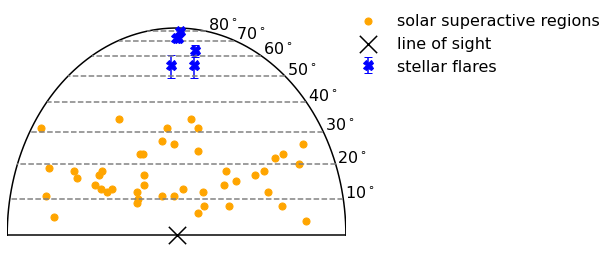

In [34]:
plt.figure(figsize=(8.8,4.))

# keep the flare longitudes randomly scattered but don't let them go off the hemisphere

lim = np.cos(outs.latitude_deg_50/180*np.pi)/4

# flares

plt.errorbar(-lim + 2*lim*np.random.rand(outs.shape[0]),
            coo.latitude_deg_50, yerr=np.array([ylow,yup,]),
            label="stellar flares", fmt="X", markersize=10, color="b", capsize=4)

# superactive regions

plt.scatter(-.8 + 1.6*np.random.rand(sun.shape[0]),
            np.sin(sun.lat/180*np.pi),
            label="solar superactive regions", marker="o", s=50, c="orange")

# hemisphere grid

x=np.linspace(0,np.pi,100)
plt.plot(np.cos(x), np.sin(x),c="k")
plt.plot(np.cos(x),[0]*len(x),c="k")
for la in [10,20,30,40,50,60,70,80]:
    ra = la/180*np.pi
    plt.text(np.cos(ra)+.01,np.sin(ra)+.01,fr"${la}^\circ$")
    plt.plot([np.cos(ra),-np.cos(ra)], [np.sin(ra),np.sin(ra)], c="grey", linestyle="dashed")

# line of sight    
plt.scatter([0],[0],marker="x", s=300, c="k", label="line of sight")

# layout

plt.ylim(-.1,1.03)
plt.xlim(-1,1)
plt.axis("off")
plt.legend(loc=(1,.75), frameon=False)
plt.tight_layout()